In [1]:
import pandas as pd
import os

In [2]:
#print(old_data)
#print(old_data.shape[0])

In [2]:
old_data_clean = pd.read_csv(os.path.join('..', 'data', 'adult.csv'))

#print(old_data)
print(old_data_clean.head())
print(old_data_clean['occupation'].value_counts())
print(old_data_clean['hours.per.week'].max())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:
number_rows = old_data_clean.shape[0]
print(f'Number of rows = {number_rows}')

od_sex = old_data['sex'].value_counts()
od_percentage_woman = (od_sex[1]/(od_sex[0]+od_sex[1]))*100
print(f'Percentage women before cleaning: {od_percentage_woman:.2f}%')

odc_sex = old_data_clean['sex'].value_counts()
odc_percentage_woman = (odc_sex[1]/number_rows)*100
print(f'Percentage women after cleaning: {odc_percentage_woman:.2f}%')

sex_income = old_data_clean[['sex','income']].value_counts()
#print(sex_income)

high_income_women = 100 * sex_income[3]/od_sex[1]
high_income_men = 100 * sex_income[2]/od_sex[0]

print(f'Percentage of women with high income {high_income_women:.2f}%')
print(f'Percentage of men with high income {high_income_men:.2f}%')

Number of rows = 32561


NameError: name 'old_data' is not defined

In [4]:
print(old_data_clean['race'].value_counts())
odc_race = old_data_clean['race'].value_counts()
odc_percentage_black = (odc_race[1]/number_rows)*100

race_income = old_data_clean[['race','income']].value_counts()
high_income_white = 100 * race_income[1]/odc_race[0]
high_income_black = 100 * race_income[4]/odc_race[1]

print(old_data_clean[['race','income']].value_counts())

print(f'Percentage black people: {odc_percentage_black:.2f}%')
print(f'Percentage high income white people: {high_income_white:.2f}%')
print(f'Percentage high income black people: {high_income_black:.2f}%')
print(old_data_clean['hours.per.week'].mean())

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
race                income
White               <=50K     20699
                    >50K       7117
Black               <=50K      2737
Asian-Pac-Islander  <=50K       763
Black               >50K        387
Asian-Pac-Islander  >50K        276
Amer-Indian-Eskimo  <=50K       275
Other               <=50K       246
Amer-Indian-Eskimo  >50K         36
Other               >50K         25
dtype: int64
Percentage black people: 9.59%
Percentage high income white people: 25.59%
Percentage high income black people: 12.39%
40.437455852092995


In [6]:
print(old_data_clean[['sex', 'education']].value_counts)

sex     education   
Male    HS-grad         7111
        Some-college    4485
        Bachelors       3736
Female  HS-grad         3390
        Some-college    2806
        Bachelors       1619
Male    Masters         1187
        Assoc-voc        882
        11th             743
        Assoc-acdm       646
        10th             638
Female  Masters          536
        Assoc-voc        500
Male    7th-8th          486
        Prof-school      484
Female  11th             432
        Assoc-acdm       421
Male    9th              370
        Doctorate        327
Female  10th             295
Male    12th             289
        5th-6th          249
Female  7th-8th          160
        9th              144
        12th             144
Male    1st-4th          122
Female  Prof-school       92
        Doctorate         86
        5th-6th           84
        1st-4th           46
Male    Preschool         35
Female  Preschool         16
dtype: int64


                   Male     Female
HS-grad       67.717360  32.282640
Some-college  61.514196  38.485804
7th-8th       75.232198  24.767802
10th          68.381565  31.618435
Doctorate     79.176755  20.823245
Prof-school   84.027778  15.972222
Bachelors     69.766573  30.233427
Masters       68.891468  31.108532
11th          63.234043  36.765957
Assoc-acdm    60.543580  39.456420
Assoc-voc     63.820550  36.179450
1st-4th       72.619048  27.380952
5th-6th       74.774775  25.225225
12th          66.743649  33.256351
9th           71.984436  28.015564
Preschool     68.627451  31.372549


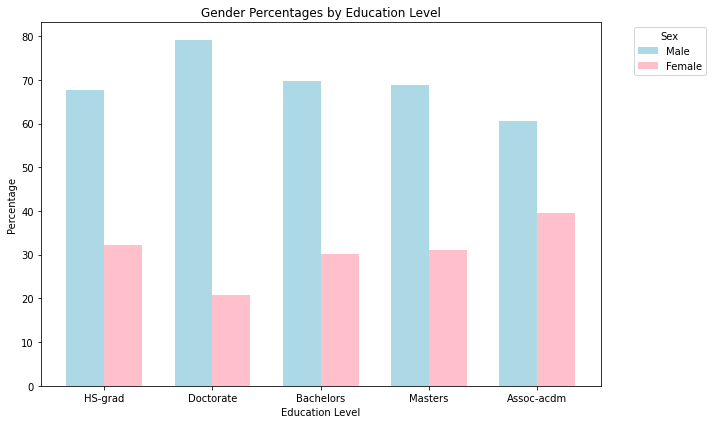

In [23]:

import matplotlib.pyplot as plt

gender_percentages = {}

# Get the unique education levels
education_levels = old_data_clean['education'].unique()

# Iterate through each education level
for level in education_levels:
    # Filter the DataFrame for the current education level
    subset = old_data_clean[old_data_clean['education'] == level]
    
    # Calculate the gender counts
    gender_counts = subset['sex'].value_counts(normalize=True) * 100
    
    # Store the results in the dictionary
    gender_percentages[level] = gender_counts.to_dict()

# Convert the dictionary to a DataFrame for better readability
result_df = pd.DataFrame(gender_percentages).transpose().fillna(0)
print(result_df)

result_df = result_df.drop(['Some-college', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','Preschool', 'Prof-school','Assoc-voc'])

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = result_df.index
bar_positions = range(len(index))

colors = {'Male': 'lightblue', 'Female': 'pink'}

# Plot bars for each gender
for i, gender in enumerate(result_df.columns):
    ax.bar(
        [pos + i * bar_width for pos in bar_positions],
        result_df[gender],
        bar_width,
        label=gender,
        color=colors.get(gender, 'gray')  # Default to gray if gender is not in the colors dict
    )

# Set the x-ticks to be in the center of grouped bars
ax.set_xticks([pos + (bar_width * (len(result_df.columns) / 2)) - (bar_width / 2) for pos in bar_positions])
ax.set_xticklabels(index)

ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
ax.set_title('Gender Percentages by Education Level')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()